<h1><center>Analysis of the mushroom dataset</h1></center>

Mushroom dataset downloaded from: https://www.kaggle.com/uciml/mushroom-classification

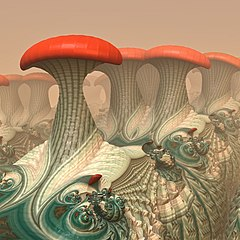

This dataset comprises of a lot of mushrooms classified either as edible or poisonous. Multiple characteristics of mushrooms are also listed. The goal of this analysis is to see if we can classify mushrooms into the two classes based on their properties, and then find out which properties are the most effective for classification.

In addition to introducing you to ML, this exercise will help you if you ever get yourself into an "Into the Wild" situation, where you have to eat mushrooms for survival.

We will first perform some exploratory data analysis to understand the data structure better. Then we will split the dataset into training and test, use the training set to train our model, followed by applying the model on the test set to validate its performance. 

### HOMEWORK INSTRUCTIONS

* This homework has 20 points
* You need the csv file mushrooms.csv for this homework. This is uploaded on Canvas already.
* Homework questions are highlighted below under the heading "Homework questions". There are 9 questions in total.
* Go through this notebook. Analyze the results and answer questions appropriately. 
* Submit answers to Canvas in a Word document with your name as the file name e.g. GauravMoghe.docx

<h2>Exploratory data analysis</h2>

In [1]:
import numpy as np; np.random.seed(1)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read the data

mush = pd.read_csv('mushrooms.csv')
class_names=list(set(mush['class']))
mush.head()
#mush
#class_names

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


First, we will perform some exploratory analysis of the data

#### HOMEWORK QUESTIONS: (2 points each)

-- How many rows and columns are there in this file?  

***There are 8124 rows and 23 columns in this dataset.***

-- Are the features numeric or categorical?  

***All the features are categorical.***

-- How many different classes do we need to predict?  

***There are only two different classes we need to predict, p versus e***

In [3]:
# view the top 5 rows of the data. How many columns are there?
#mush.head()

# After running the above command, uncomment the commands below and run this cell again

# get the size of the dataframe. How many rows and columns are there in this dataset?
print(mush.shape)

#Get some basic info
print (mush.info())

# Get some basic info on non-numerical features
mush.describe(include=['object'])

# There are different data types available. numerical (float64, int64) and non-numerical (object, boolean). 
# What are the data types of the entries in this matrix? - object
# Are there any numerical objects? - no

(8124, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-a

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


__Information about the different features can be [found here](https://archive.ics.uci.edu/ml/datasets/Mushroom)__

In [4]:
# Get the names of the different columns
print (mush.columns)

# After you get the names above, uncomment the command lines below and run the cell again

# Lets group the entries by class and get some idea about how cap-shape and cap-color are distributed by whether
# the mushroom is edible or poisonous
columns_to_show = ['cap-shape', 'cap-color', 'odor']

mush.groupby(['class'])[columns_to_show].describe(include=['object'])

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


cap-shape                  cap-color                   odor             \
          count unique top  freq     count unique top  freq count unique top   
class                                                                          
e          4208      5   x  1948      4208     10   n  1264  4208      3   n   
p          3916      5   x  1708      3916      8   n  1020  3916      7   f   

             
       freq  
class        
e      3408  
p      2160

Learn more about pandas data types [here](https://pbpython.com/pandas_dtypes.html)

In [6]:
mush3

,class,variable,value
0,0,cap-shape,0
1,1,cap-shape,0
2,1,cap-shape,1
3,0,cap-shape,0
4,1,cap-shape,0
...,...,...,...
178723,1,habitat,6
178724,1,habitat,6
178725,1,habitat,6
178726,0,habitat,6


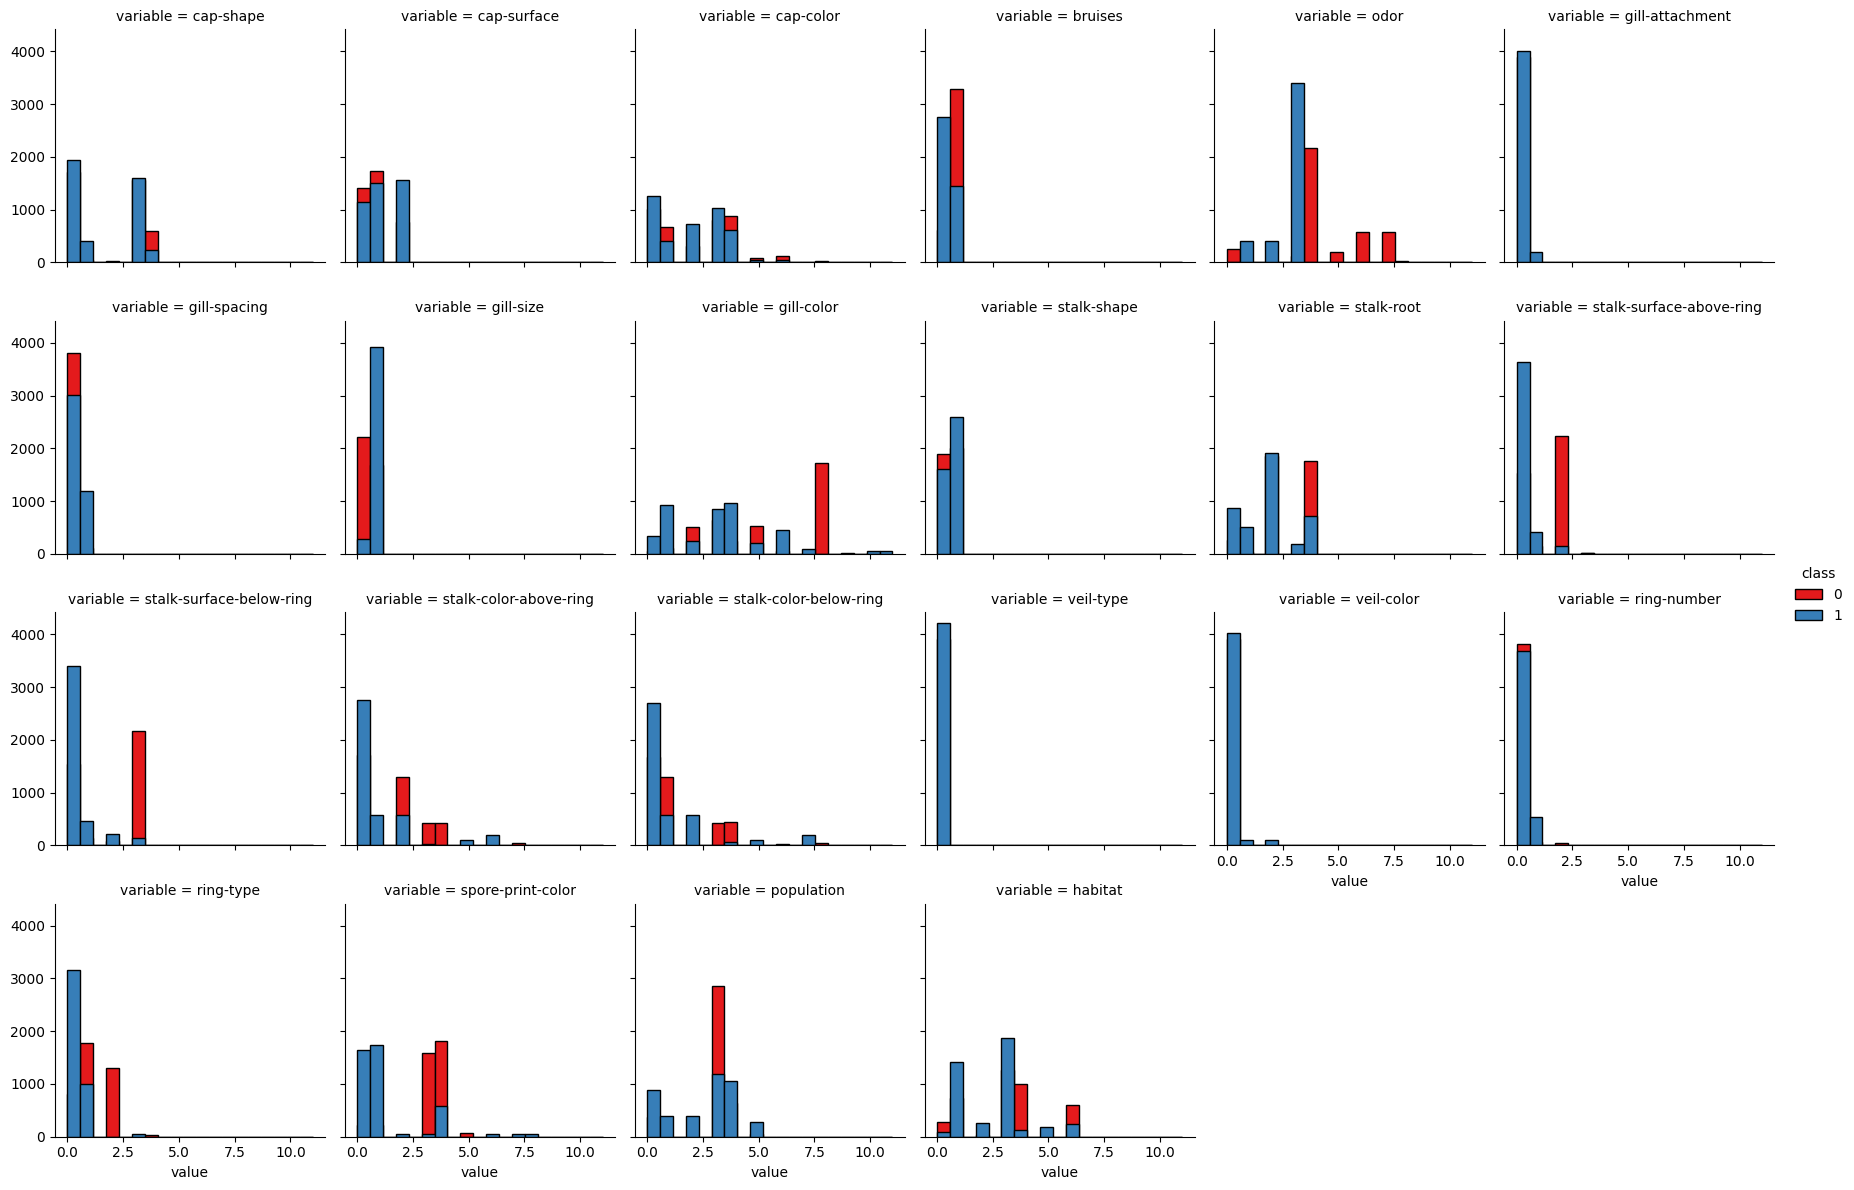

In [5]:
#Convert categorical variables into numerical variables for plotting purposes
#approach adapted from: https://stackoverflow.com/questions/45883598/pandas-histogram-df-hist-group-by
mush2=mush.apply(lambda x: pd.factorize(x)[0]) #Convert categorical data to numeric data
mush3=pd.melt(mush2,id_vars='class', value_vars=list(mush2.columns)[1:], value_name='value')

#Seaborn and matplotlib plotting
bins=np.linspace(mush3.value.min(), mush3.value.max(), 20)  #make bins
g = sns.FacetGrid(mush3, col="variable", hue="class", palette="Set1", col_wrap=6)
#g.map(sns.kdeplot, 'value')
g.map(plt.hist, 'value', bins=bins, ec="k")
g.add_legend()

#### HOMEWORK QUESTIONS: (2 points each)

* What do the red and blue colors represent?  

    - Blue and red represent the e and p mushrooms classes. These are the edible and poisonous mushrooms. Blue seems to be edible and red seems to be poisonous in the above graphs.
    

* Based on the distributions, which properties do you think are most differentiating between edible and poisonous mushrooms?  

    - Based on the distributions, odor, stalk-surface-above-ring, gill-size, stalk_surface-below-ring, stalk-color-above-ring, and perhaps spore-print-color will be the most useful in differentiating the mushrooms since these have distributions where edible and poisonous values mostly pick different values.

<h2>Running classification</h2>

Now lets run some classification algorithms. First, we will see how to run a standard classification algorithm like Decision Tree. Decision tree is a very basic, and frequently bad algorithm but is conceptually easy to understand. After running decision tree on the training set, we will check its performance on the test set. After that, we will perform ensemble learning by deploying a whole bunch of classifier models on the data, and see which model fits the data the best.

The first function we will use is setup(). Setup is a very powerful function. The following command appears very simple but there are dozens of parameters you can tune in the setup function, most of which are normally set to default.

In [7]:
import pycaret
from pycaret import classification

In [8]:
mush_setup = classification.setup(data= mush, target='class')

,Description,Value
0,session_id,5095
1,Target,class
2,Target Type,Binary
3,Label Encoded,"e: 0, p: 1"
4,Original Data,"(8124, 23)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,22
8,Ordinal Features,False
9,High Cardinality Features,False


You can see there are 43 different properties being set. The command divided the entire set of 8134 instances into training and test. 

#### HOMEWORK QUESTIONS: (2 points each)

* What percentage of the dataset was kept for test?

    - The test set has 2438 instances, and the training set has 5686 instances. The test set is 30% of the total set.

You can modify the parameters provided by specifying them inside the brackets in the command above. For help on the command, run the following

In [9]:
help(classification.setup) 

#Do the defaults tell you what is the training dataset size? - train size: float = 0.7, it is 70% of the total set

#Under what circumstances would you change it? 
####- When you want a different size training set, perhaps there isn't much data so maybe 90% goes to training.

Help on function setup in module pycaret.classification:

setup(data: Union[pandas.core.frame.DataFrame, Callable[[], pandas.core.frame.DataFrame]], target: str, train_size: float = 0.7, test_data: Union[pandas.core.frame.DataFrame, NoneType] = None, preprocess: bool = True, imputation_type: str = 'simple', iterative_imputation_iters: int = 5, categorical_features: Union[List[str], NoneType] = None, categorical_imputation: str = 'constant', categorical_iterative_imputer: Union[str, Any] = 'lightgbm', ordinal_features: Union[Dict[str, list], NoneType] = None, high_cardinality_features: Union[List[str], NoneType] = None, high_cardinality_method: str = 'frequency', numeric_features: Union[List[str], NoneType] = None, numeric_imputation: str = 'mean', numeric_iterative_imputer: Union[str, Any] = 'lightgbm', date_features: Union[List[str], NoneType] = None, ignore_features: Union[List[str], NoneType] = None, normalize: bool = False, normalize_method: str = 'zscore', transformation: bool = F

One curious thing about this dataset -- as you saw above -- is that all features are categorical. However, categorical features cannot be used directly in machine learning. So how is the algorithm using these features? Let us see what's in __mush_dt__ As you will see below, all categorical features have been converted to 1s and 0s using __one-hot-encoding__

In [32]:
mush_setup[4]

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
4209,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3385,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5560,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5504,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7853,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1477,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3796,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
777,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3445,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# We will use the function create_model to create a trained model. Let's look at what it actually does first.
# build the decision tree model
mush_dt = classification.create_model('dt')

# Do you like the overall performance of the model? - It's doing great. almost 100%

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9982,0.9981,0.9963,1.0000,0.9981,0.9965,0.9965
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [12]:
# The output shown above is fancy. Is that mush_dt? - No it's the output of 10- fold validation

mush_dt.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': 5095,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'class_weight': None,
 'presort': 'deprecated',
 'ccp_alpha': 0.0,
 'n_features_in_': 105,
 'n_features_': 105,
 'n_outputs_': 1,
 'classes_': array([0, 1]),
 'n_classes_': 2,
 'max_features_': 105,
 'tree_': <sklearn.tree._tree.Tree at 0x198aa892960>}

This shows you what an ML classifier actually is. It is basically a set of parameters optimized for a given dataset

In [13]:
# In this case, model performance is perfect, so you won't need this. But in most cases
# performance is not optimal. In those situations, you will have to tune the parameters in your model.
# PyCaret allows you to do the tuning using a very short default command
tune_dt = classification.tune_model(mush_dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9982,0.9985,0.9963,1.0000,0.9981,0.9965,0.9965
2,0.9982,0.9985,0.9963,1.0000,0.9981,0.9965,0.9965
3,0.9982,0.9986,0.9963,1.0000,0.9981,0.9965,0.9965
4,0.9982,0.9986,0.9963,1.0000,0.9981,0.9965,0.9965
5,0.9965,0.9970,0.9925,1.0000,0.9963,0.9929,0.9930
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9982,0.9985,0.9963,1.0000,0.9981,0.9965,0.9965
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


So now you have obtained a model with decision tree. Before we evaluate this model using various methods, lets take a quick look at how, instead of selecting one model, we can actually test over a dozen different classifiers at the same time and find out the best one. 

In [14]:
classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0920
svm,SVM - Linear Kernel,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0180
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0540
qda,Quadratic Discriminant Analysis,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0220
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0490
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0500
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0650
dt,Decision Tree Classifier,0.9998,0.9998,0.9996,1.0000,0.9998,0.9996,0.9996,0.0180
ridge,Ridge Classifier,0.9996,0.0000,0.9993,1.0000,0.9996,0.9993,0.9993,0.0180
gbc,Gradient Boosting Classifier,0.9996,1.0000,0.9993,1.0000,0.9996,0.9993,0.9993,0.1070


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

#### HOMEWORK QUESTIONS: (2 points each)

* The performance is phenomenally high with even the most basic models. What are your hypotheses about why the performance is so perfect?  

 - There must be some feature or combination of features that together always mean its edible or always mean its poisonous. Our data probably has some classifiers that have groups of values that are mutually exclusive or very close in regard to being poisonous and edible.

## Model evaluation

Let us first check the performance of the model on the test data. We will plot standard Area Under the Receiver Operating Characteristic (AUROC) curve and Precision-Recall (PR) curve. After that we will dig a little deeper into the features that are the most important for determining model performance.

#### HOMEWORK QUESTIONS: (2 points each)

* Which feature is the most important for classification?
    - Odor is the most important by far. Specifically the when it is non-smelling. Three odor categories made the top ten most important features and no odor itself has >60% of the importance of the model.

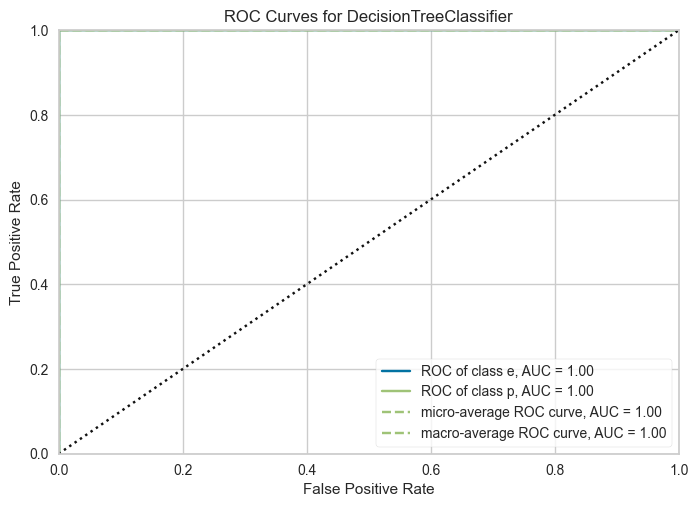

In [15]:
# AUC-ROC plot
classification.plot_model(mush_dt, plot = 'auc')

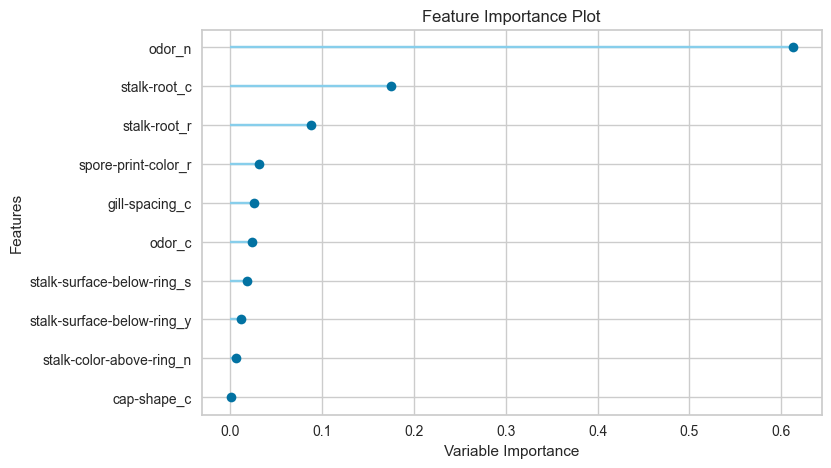

In [16]:
# Decision Boundary
classification.plot_model(mush_dt, plot = 'feature')

In [17]:
help(classification.plot_model)

Help on function plot_model in module pycaret.classification:

plot_model(estimator, plot: str = 'auc', scale: float = 1, save: bool = False, fold: Union[int, Any, NoneType] = None, fit_kwargs: Union[dict, NoneType] = None, plot_kwargs: Union[dict, NoneType] = None, groups: Union[str, Any, NoneType] = None, use_train_data: bool = False, verbose: bool = True, display_format: Union[str, NoneType] = None) -> str
    This function analyzes the performance of a trained model on holdout set.
    It may require re-training the model in certain cases.
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')
    >>> from pycaret.classification import *
    >>> exp_name = setup(data = juice,  target = 'Purchase')
    >>> lr = create_model('lr')
    >>> plot_model(lr, plot = 'auc')
    
    
    estimator: scikit-learn compatible object
        Trained model object
    
    
    plot: str, default = 'auc'
        List of available plots (ID - Na

In [18]:
# Instead of running individual commands for separate plots, you can also
# run evaluate_model and get different metrics simultaneously. Plus, you don't have to remember all the plots
# that can be made for decision tree (or any other classifier you use)
classification.evaluate_model(mush_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [19]:
# make predictions using the test set
predictions = classification.predict_model(mush_dt)
# view the predictions
predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,class,Label,Score
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,p,p,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,e,e,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,p,p,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,e,e,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,p,p,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2433,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,e,e,1.0
2434,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,p,p,1.0
2435,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,e,e,1.0
2436,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,e,e,1.0


## Model interpretation

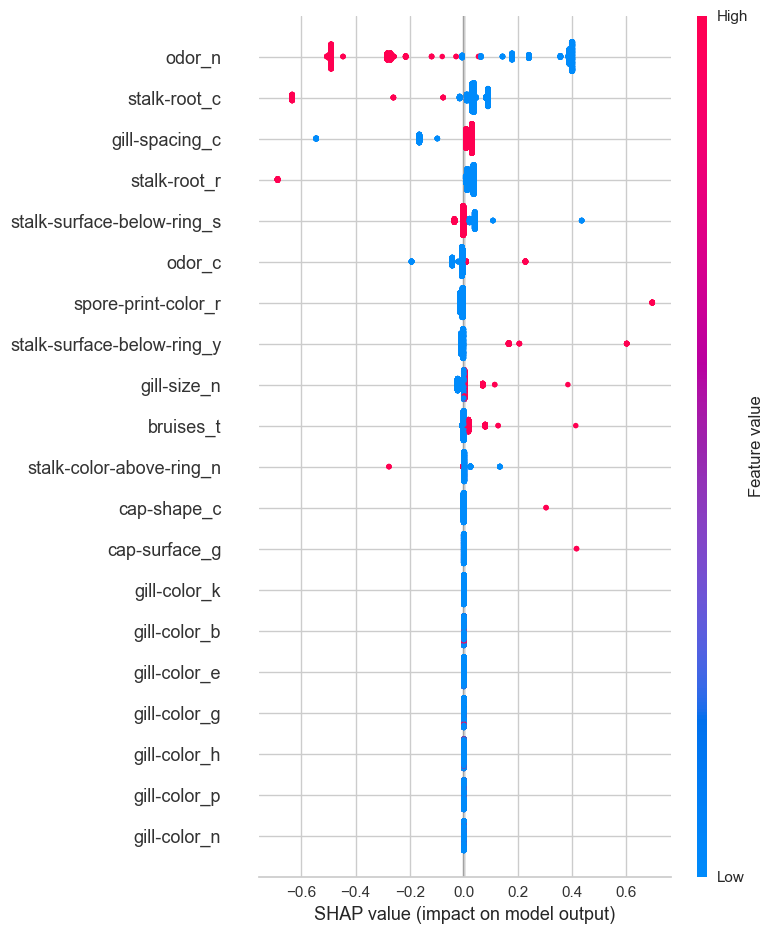

In [20]:
classification.interpret_model(mush_dt)

Again, __information about the different features can be [found here](https://archive.ics.uci.edu/ml/datasets/Mushroom)__

Let us check the distribution of these features in edible and poisonous mushrooms, just to verify the findings of the ML model

In [29]:
mush_setup[3]


4209    1
3385    0
5560    1
5504    0
7853    1
       ..
1477    0
3796    1
777     0
3445    0
7950    1
Name: class, Length: 2438, dtype: int64

In [31]:
cmush=pd.concat([pd.DataFrame(mush_setup[4]),pd.DataFrame(mush_setup[3])], axis=1)
#print (cmush.head())
columns_to_show = ['odor_n', 'stalk-root_c', 'stalk-root_r']
cmush.groupby(['class'])[columns_to_show].sum()
#cmush.groupby(['class']).sum()



#mush.groupby(['class'])[columns_to_show].describe(include=['object'])

,odor_n,stalk-root_c,stalk-root_r
class,,,
0,980.0,149.0,52.0
1,41.0,13.0,0.0


odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

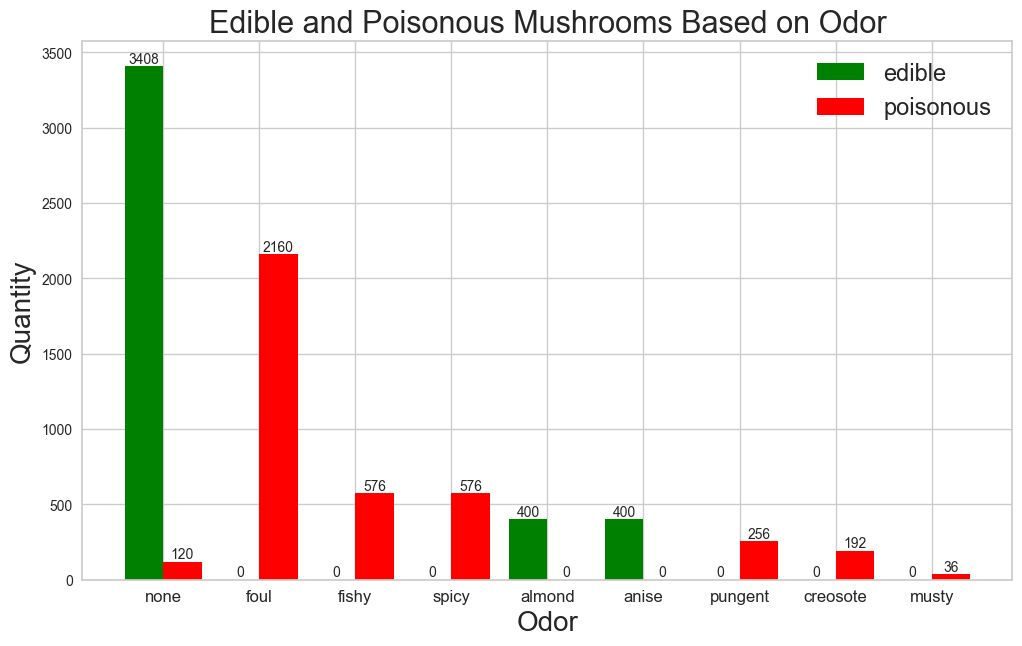

[3408, 0, 0, 0, 400, 400, 0, 0, 0]
[120, 2160, 576, 576, 0, 0, 256, 192, 36]


In [36]:
#Adapted from: https://www.kaggle.com/mig555/mushroom-classification
poisonous = [] 
edible = []    
odor_labels = mush['odor'].value_counts()
odor_labels_list=list(odor_labels.index)
ind=np.arange(len(odor_labels_list))
for odor in odor_labels_list:
    size = len(mush[mush['odor'] == odor].index)
    edibles = len(mush[(mush['odor'] == odor) & (mush['class'] == 'e')].index)
    edible.append(edibles)
    poisonous.append(size - edibles)

#Auto-labels the number of mushrooms for each bar color.
def autolabel(rects,fontsize=14):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,'%d' % int(height),
                ha='center', va='bottom',fontsize=fontsize)


#=====PLOT Preparations and Plotting====#
width = 0.40
fig, ax = plt.subplots(figsize=(12,7))
edible_bars = ax.bar(ind, edible , width, color='green')
poison_bars = ax.bar(ind+width, poisonous , width, color='red')


#Add some text for labels, title and axes ticks
ax.set_xlabel("Odor",fontsize=20)
#almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Edible and Poisonous Mushrooms Based on Odor',fontsize=22)
ax.set_xticks(ind + width / 2) #Positioning on the x axis
ax.set_xticklabels(['none','foul','fishy','spicy','almond','anise','pungent','creosote','musty'], fontsize = 12)
ax.legend((edible_bars, poison_bars),('edible','poisonous'),fontsize=17)
autolabel(edible_bars, 10)
autolabel(poison_bars, 10)
plt.show()
print(edible)
print(poisonous)

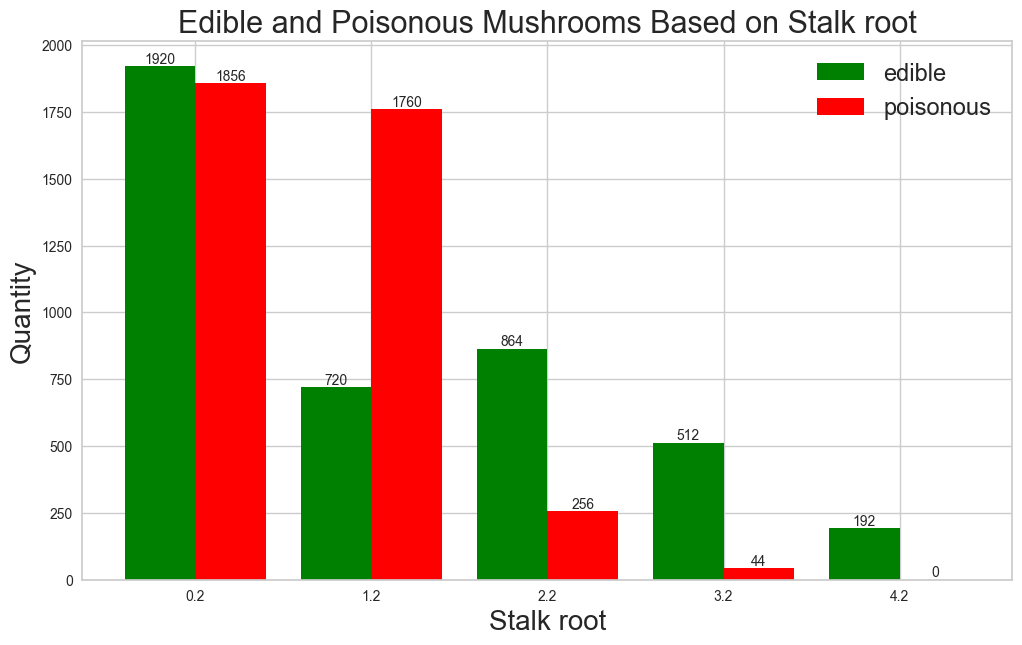

[1920, 720, 864, 512, 192]
[1856, 1760, 256, 44, 0]


In [41]:
#Adapted from: https://www.kaggle.com/mig555/mushroom-classification
poisonous = [] 
edible = []    
odor_labels = mush['stalk-root'].value_counts()
odor_labels_list=list(odor_labels.index)
ind=np.arange(len(odor_labels_list))
for odor in odor_labels_list:
    size = len(mush[mush['stalk-root'] == odor].index)
    edibles = len(mush[(mush['stalk-root'] == odor) & (mush['class'] == 'e')].index)
    edible.append(edibles)
    poisonous.append(size - edibles)

#=====PLOT Preparations and Plotting====#
width = 0.40
fig, ax = plt.subplots(figsize=(12,7))
edible_bars = ax.bar(ind, edible , width, color='green')
poison_bars = ax.bar(ind+width, poisonous , width, color='red')


#Add some text for labels, title and axes ticks
ax.set_xlabel("Stalk root",fontsize=20)
#almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Edible and Poisonous Mushrooms Based on Stalk root',fontsize=22)
ax.set_xticks(ind + width / 2) #Positioning on the x axis
#ax.set_xticklabels(['bulbous','club','cup','equal','rhizomorths','rooted'], fontsize = 12) ?

ax.legend((edible_bars, poison_bars),('edible','poisonous'),fontsize=17)
autolabel(edible_bars, 10)
autolabel(poison_bars, 10)
plt.show()
print(edible)
print(poisonous)   


#### FINAL HOMEWORK QUESTION: (4 points)

* You've got perfect classification on your ML model. Congratulations! If you are lost in the wilderness, do the results give you confidence that you can distinguish between poisonous and edible mushrooms by looking at the top 2 features? Why or why not?
    - Not at all, I would have to smell mushrooms and be able to classify them by the the categories in this dataset. I don't trust my nose to be able to do that. Even then, the top identifier is whether or not the mushroom has no smell, in which case it is probably edible. But there were still 120 counts where non smelling mushrooms were poisonous and I'm not gambling on that. Even if all those 120 have a specific stalk-root type, I'd also have to be able to identify the difference based on sight and I have no idea what the different categories mean. Even if I could, looking at the different stalk root categories, most have both poisonous and edible in the same category. I think I would die.  